Michael Hotaling<br>2/3/2020<br>DSC540
# Week 7/8 Assignment <br> So Much Candy, Seriously.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import missingno as mn

We can first start with importing the dataset using pandas.

In [2]:
df = pd.read_csv("candyhierarchy2017.csv", encoding='latin-1')
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


## Chapter 7
### Filter Out Missing Data
We can check to see which rows have missing data visually using `missingno`

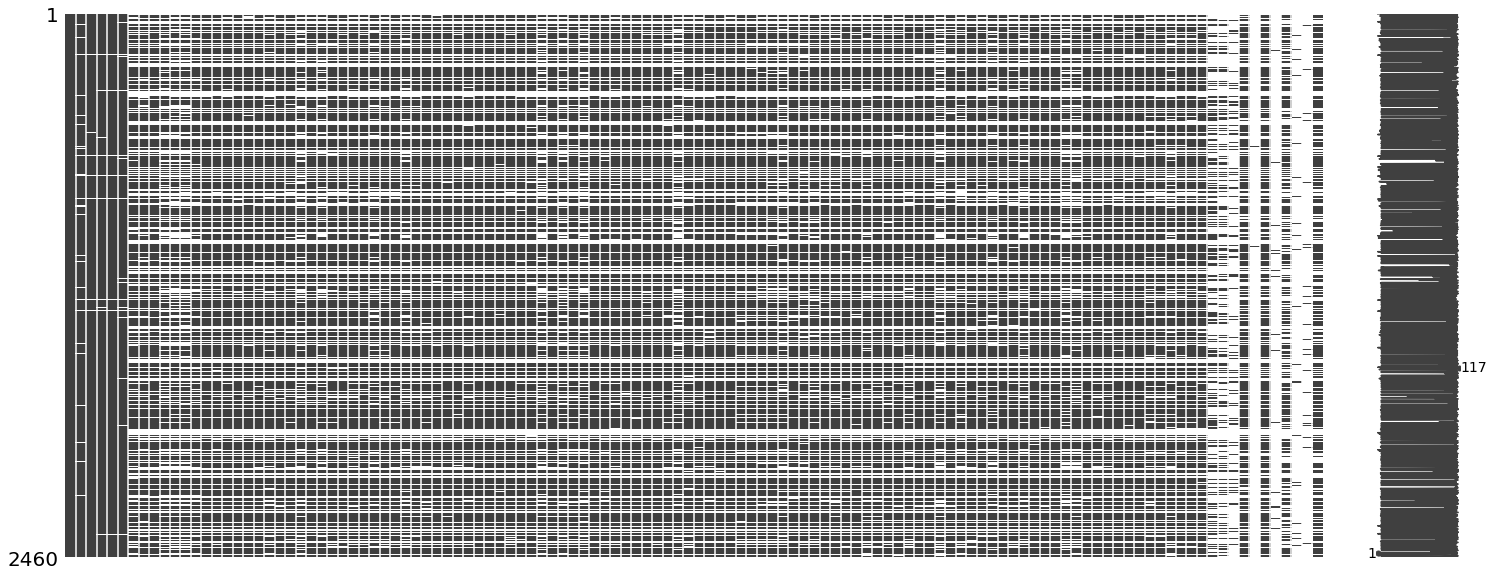

In [3]:
mn.matrix(df);

We can see here that we have a lot of missing data for several rows and columns. 

Next, we can check to see which columsn have the most NAs. We can drop the columns that seem to be outliers based on that information

<AxesSubplot:>

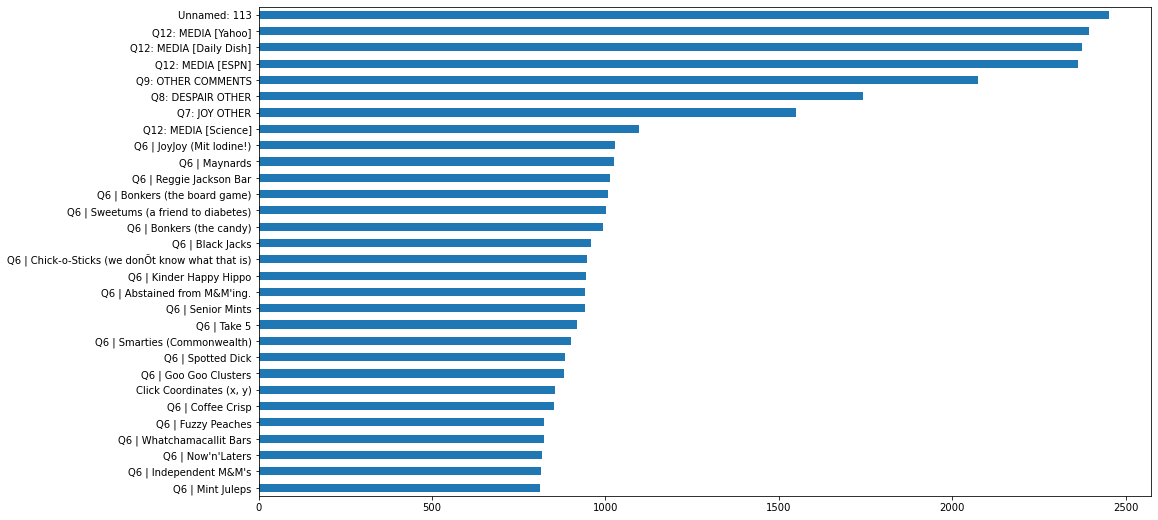

In [4]:
df.isna().sum().sort_values().tail(30).plot(kind='barh', figsize=(16,9))

We can see that we have 7 columns with a significantly larger amount of NaN values than the other columns. We can drop those columns the same as we did the previous

In [5]:
# Iteratively go over the columns with the most NaN values and drop them
for i in df.isna().sum().sort_values().tail(7).index:
    print(f"Dropping {i} Column")
    df.drop([i], axis = 1, inplace=True)

Dropping Q7: JOY OTHER Column
Dropping Q8: DESPAIR OTHER Column
Dropping Q9: OTHER COMMENTS Column
Dropping Q12: MEDIA [ESPN] Column
Dropping Q12: MEDIA [Daily Dish] Column
Dropping Q12: MEDIA [Yahoo] Column
Dropping Unnamed: 113 Column


### Filling in Missing Data
We have a few columns that contain can be simplified, such as the gender column.

In [6]:
df['Q2: GENDER'].value_counts(dropna=False)

Male                  1467
Female                 839
I'd rather not say      83
NaN                     41
Other                   30
Name: Q2: GENDER, dtype: int64

We can convert the NaN entries into an 'I'd Rather Not Say' value since NaN values would imply the user wouldn't submit their gender information

In [7]:
df['Q2: GENDER'] = df['Q2: GENDER'].fillna(value="I'd rather not say")
df['Q2: GENDER'].value_counts(dropna=False)

Male                  1467
Female                 839
I'd rather not say     124
Other                   30
Name: Q2: GENDER, dtype: int64

### Checking for Duplicates
There are no duplicated columns

In [8]:
df[df.duplicated()]

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties,Q10: DRESS,Q11: DAY,Q12: MEDIA [Science],"Click Coordinates (x, y)"


## Chapter 8


### Reshape the Data

In [9]:
# Creating a list of columns I want to keep after resturcturing
keep_columns = []
for i in df.columns:
    if i[0:2] != "Q6":
        keep_columns.append(i)

In [10]:
# Using melt to reorganize the data 
df_melt = df.melt(id_vars=keep_columns, var_name = 'CANDY', value_name="RATING" )

# Dropping the 'Q6 | ' 
df_melt['CANDY'] = df_melt['CANDY'].apply(lambda x: x[5::])

# Dropping rows with Rating == NaN
df_melt = df_melt[~df_melt['RATING'].isna()]
df_melt

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q10: DRESS,Q11: DAY,Q12: MEDIA [Science],"Click Coordinates (x, y)",CANDY,RATING
1,90272821,No,Male,44,USA,NM,White and gold,Sunday,1.0,"(84, 25)",100 Grand Bar,MEH
3,90272840,No,Male,40,us,or,White and gold,Sunday,1.0,"(75, 23)",100 Grand Bar,MEH
4,90272841,No,Male,23,usa,exton pa,White and gold,Friday,1.0,"(70, 10)",100 Grand Bar,JOY
5,90272852,No,Male,NaN,NaN,NaN,NaN,NaN,1.0,"(75, 23)",100 Grand Bar,JOY
7,90272854,No,Male,33,canada,ontario,Blue and black,Friday,1.0,"(55, 5)",100 Grand Bar,JOY
...,...,...,...,...,...,...,...,...,...,...,...,...
253374,90314022,No,Female,26,USA,Michigan,White and gold,Friday,1.0,"(68, 39)",York Peppermint Patties,JOY
253375,90314359,No,Male,24,USA,MD,White and gold,Friday,NaN,NaN,York Peppermint Patties,MEH
253376,90314580,No,Female,33,USA,New York,Blue and black,Friday,1.0,"(70, 26)",York Peppermint Patties,JOY
253377,90314634,No,Female,26,USA,Tennessee,Blue and black,Friday,1.0,"(67, 35)",York Peppermint Patties,MEH


<AxesSubplot:>

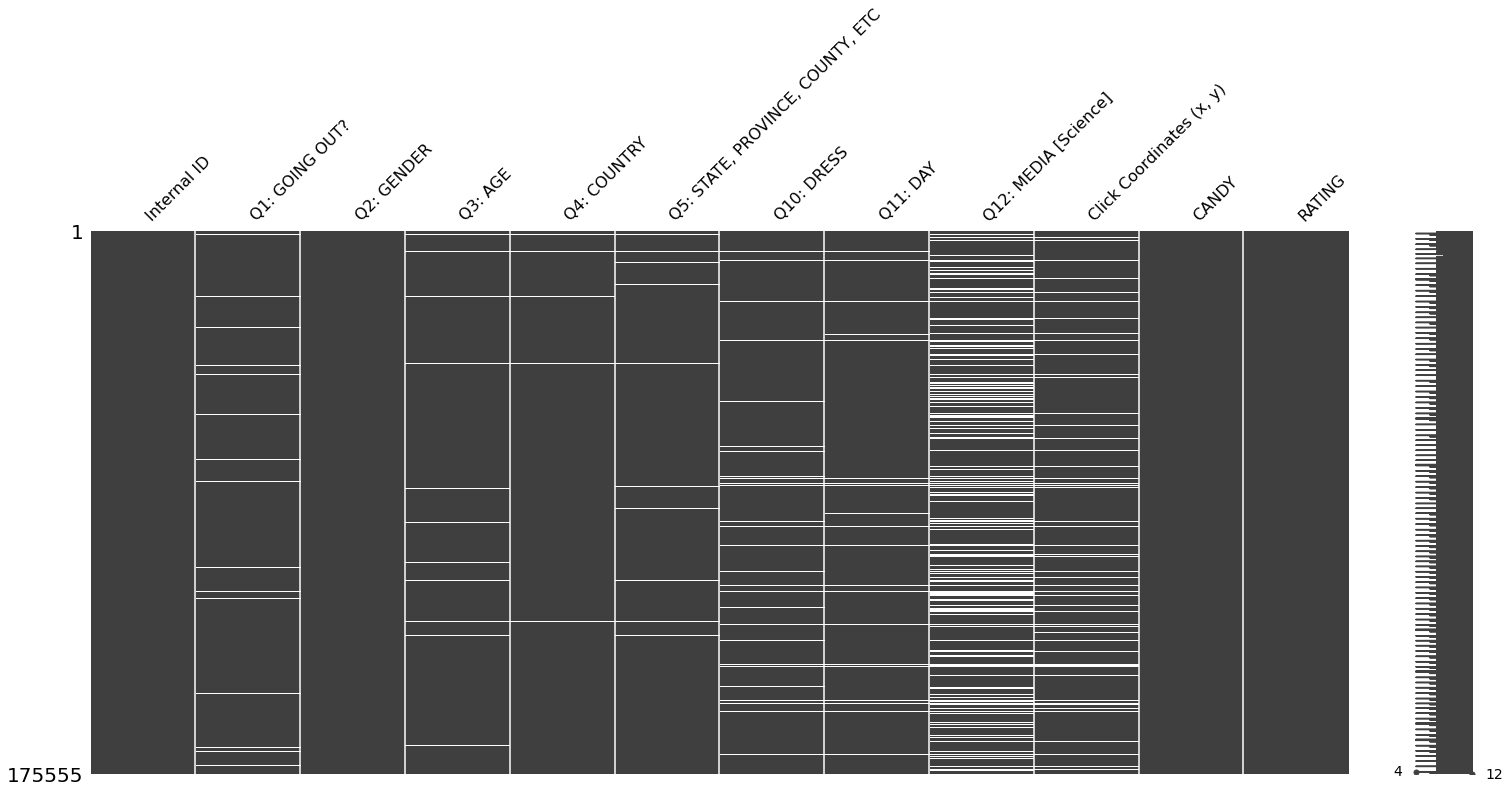

In [11]:
# Visual check of NaN values ofter cleaning
mn.matrix(df_melt)

### Create hierarchical index
We can create a Hierarchical Indexes in pandas using .`set_index` and specifying the values we'd like to have set as the index.

I just chose the two columns I created since it seems like they are the most important

In [12]:
df_melt.set_index(['CANDY','RATING'])

Internal ID Q1: GOING OUT? Q2: GENDER Q3: AGE  \
CANDY                   RATING                                                  
100 Grand Bar           MEH        90272821             No       Male      44   
                        MEH        90272840             No       Male      40   
                        JOY        90272841             No       Male      23   
                        JOY        90272852             No       Male     NaN   
                        JOY        90272854             No       Male      33   
...                                     ...            ...        ...     ...   
York Peppermint Patties JOY        90314022             No     Female      26   
                        MEH        90314359             No       Male      24   
                        JOY        90314580             No     Female      33   
                        MEH        90314634             No     Female      26   
                        JOY        90314802             No     Female      66   

                               Q4: COUNTRY Q5: STATE, PROVINCE, COUNTY, ETC  \
CANDY                   RATING                                                
100 Grand Bar           MEH           USA                                NM   
                        MEH             us                               or   
                        JOY            usa                         exton pa   
                        JOY            NaN                              NaN   
                        JOY         canada                          ontario   
...                                    ...                              ...   
York Peppermint Patties JOY            USA                         Michigan   
                        MEH            USA                               MD   
                        JOY            USA                         New York   
                        MEH           USA                         Tennessee   
                        JOY            usa                     Pennsylvania   

                                    Q10: DRESS Q11: DAY  Q12: MEDIA [Science]  \
CANDY                   RATING                                                  
100 Grand Bar           MEH     White and gold   Sunday                   1.0   
                        MEH     White and gold   Sunday                   1.0   
                        JOY     White and gold   Friday                   1.0   
                        JOY                NaN      NaN                   1.0   
                        JOY     Blue and black   Friday                   1.0   
...                                        ...      ...                   ...   
York Peppermint Patties JOY     White and gold   Friday                   1.0   
                        MEH     White and gold   Friday                   NaN   
                        JOY     Blue and black   Friday                   1.0   
                        MEH     Blue and black   Friday                   1.0   
                        JOY     White and gold   Sunday                   NaN   

                               Click Coordinates (x, y)  
CANDY                   RATING                           
100 Grand Bar           MEH                    (84, 25)  
                        MEH                    (75, 23)  
                        JOY                    (70, 10)  
                        JOY                    (75, 23)  
                        JOY                     (55, 5)  
...                                                 ...  
York Peppermint Patties JOY                    (68, 39)  
                        MEH                         NaN  
                        JOY                    (70, 26)  
                        MEH                    (67, 35)  
                        JOY                    (19, 26)  

[175555 rows x 10 columns]

We can use `melt` to combine all the different candy columns into one column. 

## Chapter 10
### Grouping with Index Levels

Now that we've added each candy bar to each column, we can set it as an index value and groupby that value.

In [13]:
# This shows us some summary statistics based on the type of candy 
pd.DataFrame(df_melt.set_index(['CANDY','RATING']).groupby(level = ['CANDY','RATING']).describe()['Internal ID']['count']).sort_values(by='count', ascending=False)

,,count
CANDY,RATING,
Broken glow stick,DESPAIR,1625.0
Any full-sized candy bar,JOY,1559.0
ReeseÕs Peanut Butter Cups,JOY,1498.0
Real Housewives of Orange County Season 9 Blue-Ray,DESPAIR,1480.0
Gum from baseball cards,DESPAIR,1462.0
...,...,...
White Bread,JOY,44.0
Gum from baseball cards,JOY,44.0
Candy that is clearly just the stuff given out for free at restaurants,JOY,39.0


### Grouping with Functions

In [14]:
# Using the size function
pd.DataFrame(df_melt.groupby(['CANDY','RATING']).size()).sort_values('CANDY', ascending=True)

0
CANDY                   RATING       
100 Grand Bar           DESPAIR    85
                        JOY       873
                        MEH       755
Abstained from M&M'ing. DESPAIR   693
                        JOY       218
...                               ...
Whole Wheat anything    DESPAIR  1289
                        MEH       307
York Peppermint Patties JOY      1105
                        DESPAIR   232
                        MEH       418

[309 rows x 1 columns]

## Chapter 11


### Convert between string and date time
There is no time series data in this dataset, so I'll just generate some of my own


In [15]:
import numpy as np

years = np.random.randint(low = 1990,high = 2022, size = 50)
months = np.random.randint(low = 1,high = 13, size = 50)
days = np.random.randint(low = 1, high = 29, size = 50) # Had to lower days to 28 total days since Feb kept messing up

dates = []
for month, day, year in zip(months, days, years):
    dates.append(f"{month}/{day}/{year}")
print(dates)
print(type(dates[0]))

['5/17/1991', '2/8/2000', '2/20/2014', '3/5/2003', '3/10/1992', '8/2/2005', '8/2/1995', '11/25/1994', '5/14/2018', '8/8/1993', '1/17/1995', '2/2/1993', '10/15/2012', '11/1/1995', '5/13/2012', '12/8/2000', '1/19/2020', '7/27/2020', '7/23/2014', '8/16/2017', '9/26/2012', '2/12/2021', '10/13/1995', '9/22/2017', '12/23/2001', '7/24/2003', '11/27/2020', '7/28/2020', '6/28/1998', '10/22/2016', '7/2/2019', '9/11/2003', '8/7/2001', '12/28/2021', '1/16/2005', '2/23/2014', '8/8/1994', '8/8/2012', '10/22/2005', '8/25/2005', '5/7/2019', '9/24/2017', '8/20/2021', '6/15/1998', '6/28/2017', '2/10/2001', '12/9/2012', '12/1/2019', '1/18/2015', '9/3/2018']
<class 'str'>


In [16]:
pd.to_datetime(dates)

DatetimeIndex(['1991-05-17', '2000-02-08', '2014-02-20', '2003-03-05',
               '1992-03-10', '2005-08-02', '1995-08-02', '1994-11-25',
               '2018-05-14', '1993-08-08', '1995-01-17', '1993-02-02',
               '2012-10-15', '1995-11-01', '2012-05-13', '2000-12-08',
               '2020-01-19', '2020-07-27', '2014-07-23', '2017-08-16',
               '2012-09-26', '2021-02-12', '1995-10-13', '2017-09-22',
               '2001-12-23', '2003-07-24', '2020-11-27', '2020-07-28',
               '1998-06-28', '2016-10-22', '2019-07-02', '2003-09-11',
               '2001-08-07', '2021-12-28', '2005-01-16', '2014-02-23',
               '1994-08-08', '2012-08-08', '2005-10-22', '2005-08-25',
               '2019-05-07', '2017-09-24', '2021-08-20', '1998-06-15',
               '2017-06-28', '2001-02-10', '2012-12-09', '2019-12-01',
               '2015-01-18', '2018-09-03'],
              dtype='datetime64[ns]', freq=None)

### Generate date range

In [17]:
from datetime import date

In [18]:
dates = pd.date_range('2020-01-01',date.today())
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07'],
              dtype='datetime64[ns]', length=404, freq='D')


### Frequencies and date offsets

In [19]:
from pandas.tseries.offsets import Hour, Minute

nine_hours = Hour(9)
thirty_minutes = Minute(30)

dates = dates+nine_hours+thirty_minutes
dates

DatetimeIndex(['2020-01-01 09:30:00', '2020-01-02 09:30:00',
               '2020-01-03 09:30:00', '2020-01-04 09:30:00',
               '2020-01-05 09:30:00', '2020-01-06 09:30:00',
               '2020-01-07 09:30:00', '2020-01-08 09:30:00',
               '2020-01-09 09:30:00', '2020-01-10 09:30:00',
               ...
               '2021-01-29 09:30:00', '2021-01-30 09:30:00',
               '2021-01-31 09:30:00', '2021-02-01 09:30:00',
               '2021-02-02 09:30:00', '2021-02-03 09:30:00',
               '2021-02-04 09:30:00', '2021-02-05 09:30:00',
               '2021-02-06 09:30:00', '2021-02-07 09:30:00'],
              dtype='datetime64[ns]', length=404, freq='D')

### Convert timestamps to periods and back

In [20]:
period = pd.Series(dates).dt.to_period('W')
period

0      2019-12-30/2020-01-05
1      2019-12-30/2020-01-05
2      2019-12-30/2020-01-05
3      2019-12-30/2020-01-05
4      2019-12-30/2020-01-05
               ...          
399    2021-02-01/2021-02-07
400    2021-02-01/2021-02-07
401    2021-02-01/2021-02-07
402    2021-02-01/2021-02-07
403    2021-02-01/2021-02-07
Length: 404, dtype: period[W-SUN]

In [21]:
period.dt.to_timestamp(how='end')

0     2020-01-05 23:59:59.999999999
1     2020-01-05 23:59:59.999999999
2     2020-01-05 23:59:59.999999999
3     2020-01-05 23:59:59.999999999
4     2020-01-05 23:59:59.999999999
                   ...             
399   2021-02-07 23:59:59.999999999
400   2021-02-07 23:59:59.999999999
401   2021-02-07 23:59:59.999999999
402   2021-02-07 23:59:59.999999999
403   2021-02-07 23:59:59.999999999
Length: 404, dtype: datetime64[ns]